# Proyek Analisis Data: [E-commerce Public Dataset]
- **Nama:** Sutiyono
- **Email:** sutiyonodoang@gmail.com
- **ID Dicoding:** tiyo

## Menentukan Pertanyaan Bisnis

- Berapa jumlah tren order dari waktu ke waktu, dalam satuan bulan?
- 10 state/negara teratas dengan jumlah order terbanyak pada rentang waktu tertentu? 
- Pada jam berapa dan hari apa saja terjadi lonjakan jumlah pesanan? (Peak ordering time)

## Import Semua Packages/Library yang Digunakan

In [355]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

Dataset yang saya gunakan adalah e-commerce public dataset. Berdasarkan pertanyaan bisnis diatas, maka hanya beberapa file csv saja yang akan digunakan, yaitu `orders_dataset.csv` dan `customers_dataset.csv`


#### Loading orders dataset

In [356]:
# loading dataset orders & customers
# Karena yang akan kita lihat adalah jumlah order, 
# maka saya memutuskan untuk menghitung order dengan status delivered, 
# dengan alasan bahwa jumlah order yang akan dihitung merupakan jumlah order yang memang sudah pasti selesai.
# Orders dataset ini akan digunakan untuk menjawab soal nomor 1 dan 3.

orders_df = pd.read_csv('orders_dataset.csv')
orders_df = orders_df[orders_df['order_status'] == 'delivered']
orders_df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### Loading customers dataset

In [357]:
# customers dataset
customers_df = pd.read_csv('customers_dataset.csv')
customers_df.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Assessing Data

#### Orders dataset

In [358]:
# melihat informasi struktur data pada order dataset
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96478 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96478 non-null  object
 1   customer_id                    96478 non-null  object
 2   order_status                   96478 non-null  object
 3   order_purchase_timestamp       96478 non-null  object
 4   order_approved_at              96464 non-null  object
 5   order_delivered_carrier_date   96476 non-null  object
 6   order_delivered_customer_date  96470 non-null  object
 7   order_estimated_delivery_date  96478 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


In [359]:
# menampilkan jumlah data yang null/kosong pada order dataset
print('Data null pada tabel orders:\n ', orders_df.isna().sum(), '\n\n')

Data null pada tabel orders:
  order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64 




In [360]:
# melihat jumlah data yang duplikat pada order dataset
print('Jumlah data duplikat:', orders_df.duplicated().sum())

Jumlah data duplikat: 0


#### Customers dataset

In [361]:
# melihat informasi struktur data pada customer dataset
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [362]:
# menampilkan jumlah data yang null/kosong pada customer dataset
print('Data null pada tabel orders:\n ',customers_df.isna().sum(), '\n\n')

Data null pada tabel orders:
  customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64 




In [363]:
# melihat jumlah data yang duplikat pada order dataset
print('Tabel customers:', customers_df.duplicated().sum())

Tabel customers: 0


### Cleaning Data

#### Membersihkan tabel `orders_df`
- cek duplikat data --> jumlah data duplikat 0, sehingga data sudah bagus
- cek missing value --> saya hilangkan saja, karena jumlahnya yang tidak signifikan
- cek type data --> Beberapa kolom belum sesuai, sehingga perlu dirubah. Berdasarkan temuan, bahwa kolom `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, `order_estimated_delivery_date` seharusnya bertipe `datetime`, bukan `object`, sehingga perlu disesuaikan
- untuk menjawab pertanyaan nomor 3, kita perlu meng-ekstrak jam dan hari dari kolom order_purchase_timestamp

In [364]:
# cek duplikat data pada order dataset, jika ada maka data akan dihapus
print("Jumlah data duplikat pada order dataset: ", orders_df.duplicated().sum())

Jumlah data duplikat pada order dataset:  0


In [365]:
# cek jumlah missing value pada order dataset sebelum dihapus
print(orders_df.isna().sum())

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64


In [366]:
# Menghapus semua kolom yang memiliki missing value, dengan pertimbangan yang sudah disampaikan diatas.
orders_df = orders_df.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'])
print(orders_df.isna().sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


In [367]:
# cek informasi type data pada order dataset
print(orders_df.info())

# Merubah type data pada kolom tertentu, dari object menjadi datetime
datetime_columns = ["order_purchase_timestamp", 
                    "order_approved_at", 
                    "order_delivered_carrier_date", 
                    "order_delivered_customer_date", 
                    "order_estimated_delivery_date"]

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

print(orders_df.info())

# extrak jam dan hari dari kolom order_purchase_timestamp kedalam kolom order_hour dan order_dayofweek
orders_df['order_hour'] = orders_df['order_purchase_timestamp'].dt.hour
orders_df['order_dayofweek'] = orders_df['order_purchase_timestamp'].dt.dayofweek
print(orders_df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96455 non-null  object
 1   customer_id                    96455 non-null  object
 2   order_status                   96455 non-null  object
 3   order_purchase_timestamp       96455 non-null  object
 4   order_approved_at              96455 non-null  object
 5   order_delivered_carrier_date   96455 non-null  object
 6   order_delivered_customer_date  96455 non-null  object
 7   order_estimated_delivery_date  96455 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id  

#### Membersihkan tabel `customers_df`

- cek duplikat data --> jumlah data duplikat 0, sehingga data sudah bagus
- cek missing value --> tidak ada missing value
- cek type data --> sudah sesuai
- pada customer dataset ditak ada yang dilakukan untuk proses data cleaning, karena data sudah sesuai

In [368]:
# cek duplikat data pada customer dataset, jika ada maka data akan dihapus
print("Jumlah data duplikat pada customer dataset: ", customers_df.duplicated().sum())

Jumlah data duplikat pada customer dataset:  0


In [369]:
# cek jumlah missing value pada customer dataset
print(customers_df.isna().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [370]:
# cek informasi type data pada customer dataset
print(customers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


## Exploratory Data Analysis (EDA)

### Explore orders_df

In [371]:
# order dataset (no.1)
print(orders_df.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15

### Explore customers_df

In [372]:
# Data yang dibutuhkan perlu adanya penggabungan/join antara order dataset dengan customer dataset,
# Berikut adalah code join-nya
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
top10_orderByState = orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(10)
# top10_orderByState.index.name = 'state'

print(top10_orderByState)

customer_state
SP    40488
RJ    12348
MG    11351
RS     5342
PR     4923
SC     3546
BA     3256
DF     2080
ES     1995
GO     1957
Name: order_id, dtype: int64


## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa jumlah tren order dari waktu ke waktu?

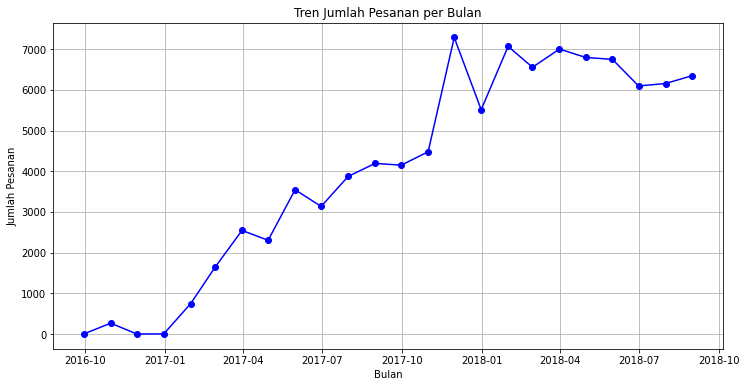

In [373]:
df = orders_df

# Mengubah kolom order_purchase_timestamp ke dalam format datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Mengelompokkan data berdasarkan bulan dan menghitung jumlah pesanan tiap bulan
monthly_orders = df.resample('M', on='order_purchase_timestamp').size()

# Membuat plot tren jumlah pesanan
plt.figure(figsize=(12, 6))
plt.plot(monthly_orders, marker='o', linestyle='-', color='b')
plt.title('Tren Jumlah Pesanan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.grid(True)
plt.show()


### Pertanyaan 2: 10 state/negara teratas dengan jumlah order terbanyak pada rentang waktu tertentu? 

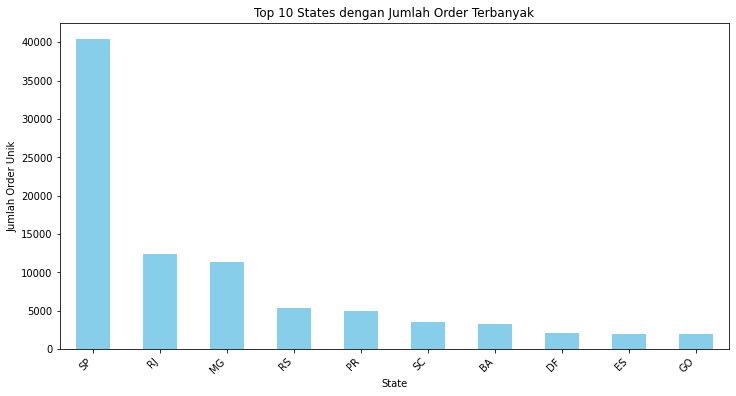

In [374]:
# Membuat visualisasi 10 state dengan jumlah order terbanyak
plt.figure(figsize=(12, 6))
top10_orderByState.plot(kind='bar', color='skyblue')
plt.xlabel('State')
plt.ylabel('Jumlah Order Unik')
plt.title('Top 10 States dengan Jumlah Order Terbanyak')
plt.xticks(rotation=45, ha='right')  # Rotasi label agar lebih mudah dibaca
plt.show()

### Pertanyaan 3: Pada jam berapa dan hari apa saja terjadi lonjakan jumlah pesanan? (Peak ordering time)

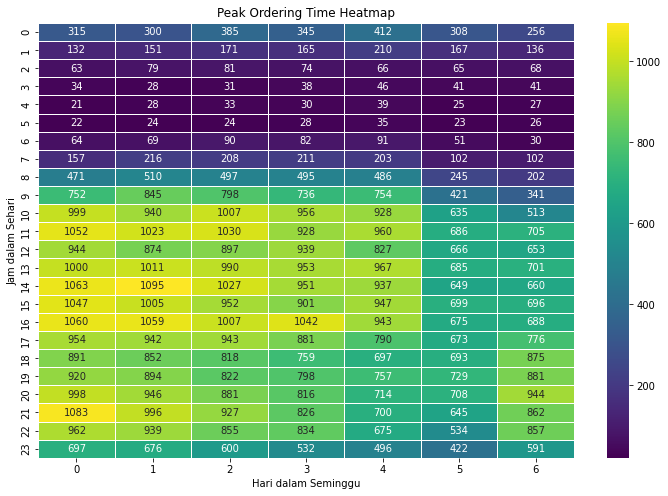

In [375]:
# Menghitung jumlah pesanan setiap jam pada setiap hari
order_heatmap_data = df.pivot_table(index='order_hour', columns='order_dayofweek', values='order_id', aggfunc='count')

# Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(order_heatmap_data, cmap='viridis', annot=True, fmt='g', linewidths=.5)
plt.title('Peak Ordering Time Heatmap')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jam dalam Sehari')
plt.show()

## Conclusion

#### Pertanyaan 1
Berdasarkan pada line graph yang didapat, maka didapat beberapa kesimpulan sebagai berikut:
- Tahun 2016 hanya ada 3 bulan data, tren jumlah order menurun, namun tidak signifikan.
- Tahun 2017 mengalami tren kenaikan yang sangat signifikan dari bulan ke bulannya, walaupun ada bulan (yaitu bulan 5, 7, dan 10) dimana jumlah order mengalami penurunan tapi tidak signifikan jika dibanding dengan kenaikan bulan-bulan yang lain.
- Tahun 2018 diawali dengan penurunan jumlah order kurang lebih setengahnya dari jumlah kenaikan bulan sebelumnya. 10 bulan bejalan mengalami kenaikan jumlah order, tapi tidak se ekxtrim pada tahun 2017
- kenaikan paling tinggi selama periode data adalah pada periode desember 2017, sementara penurunan jumlah order berada pada bulan berikutnya, yaitu januari 2018

#### Pertanyaan 2
Berdasarkan pada grafik column yang didapat, maka didapat beberapa kesimpulan sebagai berikut:
- Dari grafik terlihat bahwa terdapat satu state yang mendominasi jumlah order, yaitu SP. Jumlah order di SP sangat signifikan dibandingkan state lainnya. Ini menunjukkan adanya sentralisasi aktivitas bisnis atau populasi di area tersebut.
- 9 State yang lainya memiliki perbedaan jumlah order yang tidak signifikan.
- Grafik top 10 state ini mungkin memiliki pangsa pasar yang signifikan dalam konteks bisnis. Oleh karena itu, fokus pada pemasaran dan layanan pelanggan di state-state ini dapat menjadi strategi yang efektif untuk meningkatkan penjualan.")
- Pemahaman mengapa beberapa state memiliki jumlah order yang lebih tinggi dibandingkan dengan yang lain dapat membantu perusahaan untuk memperbaiki atau mengoptimalkan strategi kedepan.
- Analisis lebih lanjut sangat dibutuhkan terhadap data 10 state dengan order paling banyak ini untuk bisa berstrategi lebih spesifik.

#### Pertanyaan 3
Berdasarkan pada grafik heatmap, maka dapat diambil beberapa kesimpulan pola peak order yang terjadi sebagai berikut:
- Jumlah order mengalami peningkatan mulai dari pukul 8, dan mulai menurun pukul 22, sementara harinya mulai dari senin hingga jumat
- Jumlah order pada hari sabtu dan minggu cenderung stabil, berada di 60%-70% dari total order di jam dan hari paling ramai, dan mulai bertambah hinggai kisaran 80% pada minggu malam.
- Pada pukul 10 hingga pukul 16, hari senin hingga rabu merupakan peak order paling tinggi.
- Dengan pola order yang digambarkan pada heatmap ini kita bisa mengetahui beban layanan yang harus dipersiapkan perusahaan